## Homework 01: Tools and first physics programs
### PHYS420 — Intro to Computational Physics — Fall 2025  
### Hayden Dauphin

In [123]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sci 
import astropy as asp
import astropy.units as u 
from astropy.constants import k_B, g0
import platform

# ----- PART 2: Quick sanity program (constants and units) -----

#1. Prints your name, toolchain, and language version
print("#1. Prints your name, toolchain, and language version\n")
print("""Name: Hayden Dauphin
Toolchain: REVISIT AFTER WATCHING LECTURE 2
Language version: Python""", platform.python_version(), "\n\n")

#2. Converts 300 K to energy in joules and in electronvolts using k_B
print("#2. Converts 300 K to energy in Joules and in electronvolts using k_B\n")
T = 300. * u.K # Temp in Kelvin
E_joules = T.to(u.J, equivalencies=u.temperature_energy()) # convert to Joules
EV = T.to(u.eV, equivalencies=u.temperature_energy()) # convert to eV

print(f"{T.value:.0f}. {T.unit}", "\n=", f"{E_joules:.2e}", "\n=", f"{EV:.3f}", "\n\n") # print results

#3. Computes the most probable speed of N_2 molecules at T = 300 K
print("#3. Computes the most probable speed of N_2 molecules at T = 300 K\n")

m = 28*1.66054e-27 * u.kg # mass of N2 (given)
v_mp = ((2*k_B*T)/m)**0.5 # calculate most probably speed 
print("v_mp =", f"{v_mp.to(u.m/u.s):.2f}") # print results with correct units 

#1. Prints your name, toolchain, and language version

Name: Hayden Dauphin
Toolchain: REVISIT AFTER WATCHING LECTURE 2
Language version: Python 3.12.6 


#2. Converts 300 K to energy in Joules and in electronvolts using k_B

300. K 
= 4.14e-21 J 
= 0.026 eV 


#3. Computes the most probable speed of N_2 molecules at T = 300 K

v_mp = 422.10 m / s


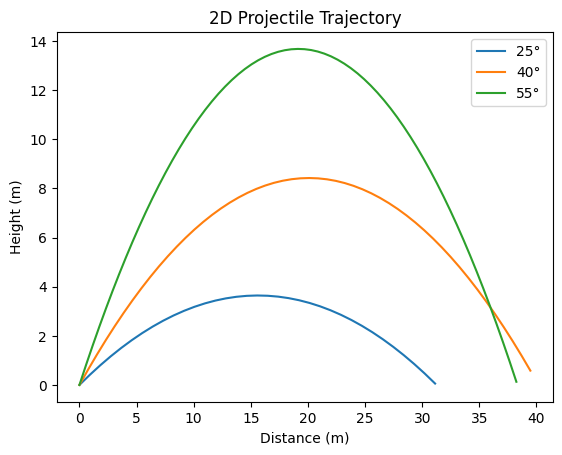

In [129]:
# ----- Part 3: Physics exercise A — 2D projectile motion -----

# For inital speed v_0 and launch angle theta_0, 
#1. For v_0 = 20m/s and theta_0 includes 25 deg, 40 deg, and 55 deg, generate x(t), y(t) on the interval from launch to landing and plot the trajectories y(x). 

# t = Array of 5 seconds, angles = angle of launch, v_0 = initial velocity, g = gravitational force 9.81 m/s^2, t_vals = list of times of flight, R_vals = list of ranges, H_vals, list of max heights 
t = np.linspace(0, 5, 100)
angles = [25, 40, 55]
v_0 = 20 
g = g0.value
t_vals = []
R_vals = []
H_vals = []

for theta_0 in angles:
    theta = np.radians(theta_0) # convert degrees to radians
    x = v_0*np.cos(theta)*t # eqn of motion in x dir
    y = v_0*np.sin(theta)*t - 0.5*g*(t**2) # eqn of motion in y dir
    t_f = (2*v_0*np.sin(theta))/g # time of flight 
    t_vals.append(t_f) # add t_f(theta) to the results 
    R = (v_0**2 *np.sin(2*theta))/g # range
    R_vals.append(R) # add R(theta) to the results 
    H_max = (v_0*np.sin(theta))**2/(2*g) # max height 
    H_vals.append(H_max) # add H(theta) to the results 
    
    # Stop graph when y = 0 (projectile hits the ground)
    mask = y >= 0
    x = x[mask]
    y = y[mask]

    # Plot trajectory of each angle
    plt.plot(x, y, label=f"{theta_0}°")


#General plot stuff
plt.title("2D Projectile Trajectory")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

#2. Compute the time of flight t_f, range R, and maximum height H. Present in a small table of theta_0, t_f, R, and H.
table_data = [] 
for a, tf, r, h in zip(angles, t_vals, R_vals, H_vals):
    table_data.append([f"{a}", f"{tf:.2f}", f"{r:.2f}", f"{h:.2f}"])
